### Pair programming - Estandarización de datos 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [21]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None

# Para estandarizar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [22]:
df = pd.read_csv("data/adult.data_limpio.csv", index_col = 0 )
df.head(2)

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640


In [23]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,education_yrs,capital_gain,capital_lost,hours_week,salary
39,,,,,
50,13,0,0,13,24006
38,9,0,0,40,44640
53,7,0,0,40,18011
28,13,0,0,40,29747
37,14,0,0,40,19350


In [24]:
numericas.drop(["salary"], axis = 1, inplace = True)

# StandardScaler

In [25]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [26]:
# ajustamos nuestros datos.  

scaler.fit(numericas)

StandardScaler()

In [27]:
# transformamos los datos

numericas_escaladas = scaler.transform(numericas)

In [28]:
# Convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(numericas_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,education_yrs,capital_gain,capital_lost,hours_week
0,1.134779,-0.145914,-0.216663,-2.22212
1,-0.420027,-0.145914,-0.216663,-0.03543


In [29]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
education_yrs,32560.0,5.281061e-17,1.000015,-3.529637,-0.420027,-0.031325,0.746077,2.300883
capital_gain,32560.0,-1.964031e-17,1.000015,-0.145914,-0.145914,-0.145914,-0.145914,13.394381
capital_lost,32560.0,4.517271e-17,1.000015,-0.216663,-0.216663,-0.216663,-0.216663,10.593345
hours_week,32560.0,2.869667e-16,1.000015,-3.193982,-0.035430,-0.035430,0.369513,4.742893


- Observamos en la columna std (desviacion estandar) que todos los valores están en torno al 1, es decir, estandarizados. 

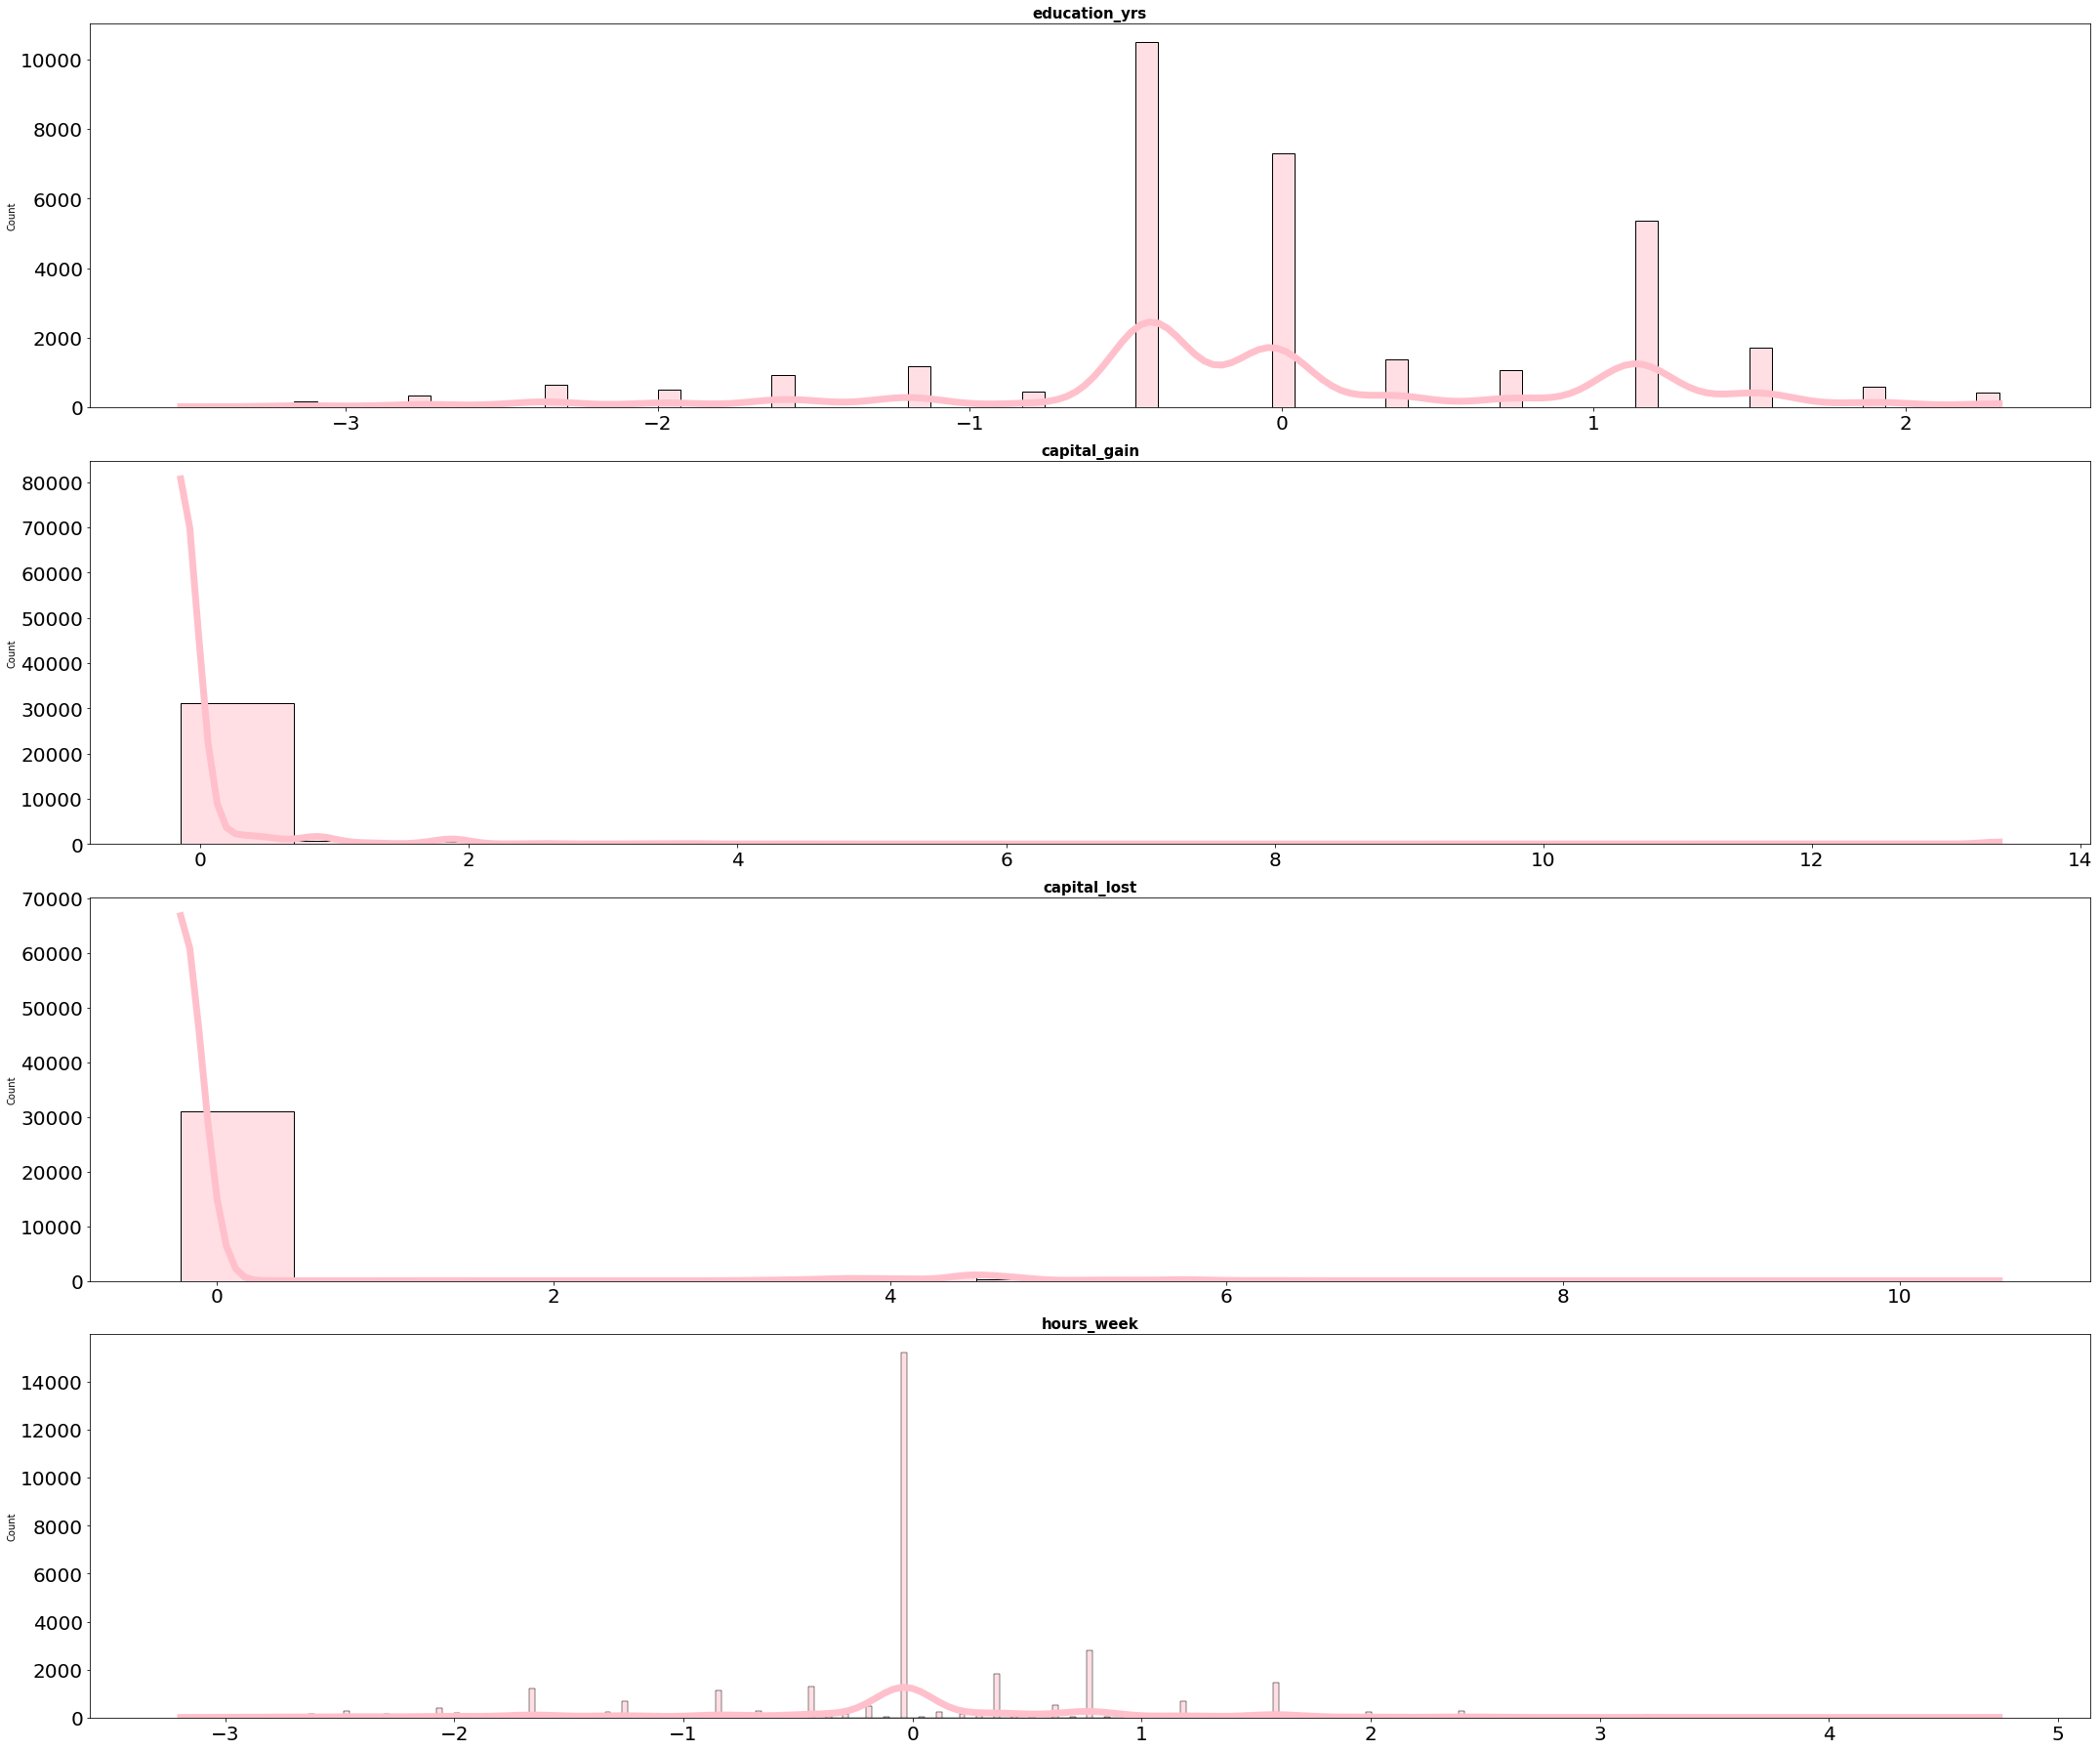

In [30]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (30, 25))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 7},
        color = "pink",
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

# RobustScaler

In [31]:
# construir el modelo de escalador
robust = RobustScaler()

In [32]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [33]:
# transformamos los datos
numericas_robust = robust.transform(numericas)

In [34]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(numericas_robust, columns = numericas.columns)
numericas_robust.head(2)

,education_yrs,capital_gain,capital_lost,hours_week
0,1.000000,0.0,0.0,-5.4
1,-0.333333,0.0,0.0,0.0


In [35]:
numericas_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
education_yrs,32560.0,0.026863,0.857570,-3.0,-0.333333,0.0,0.666667,2.0
capital_gain,32560.0,1077.615172,7385.402999,0.0,0.000000,0.0,0.000000,99999.0
capital_lost,32560.0,87.306511,402.966116,0.0,0.000000,0.0,0.000000,4356.0
hours_week,32560.0,0.087494,2.469524,-7.8,0.000000,0.0,1.000000,11.8


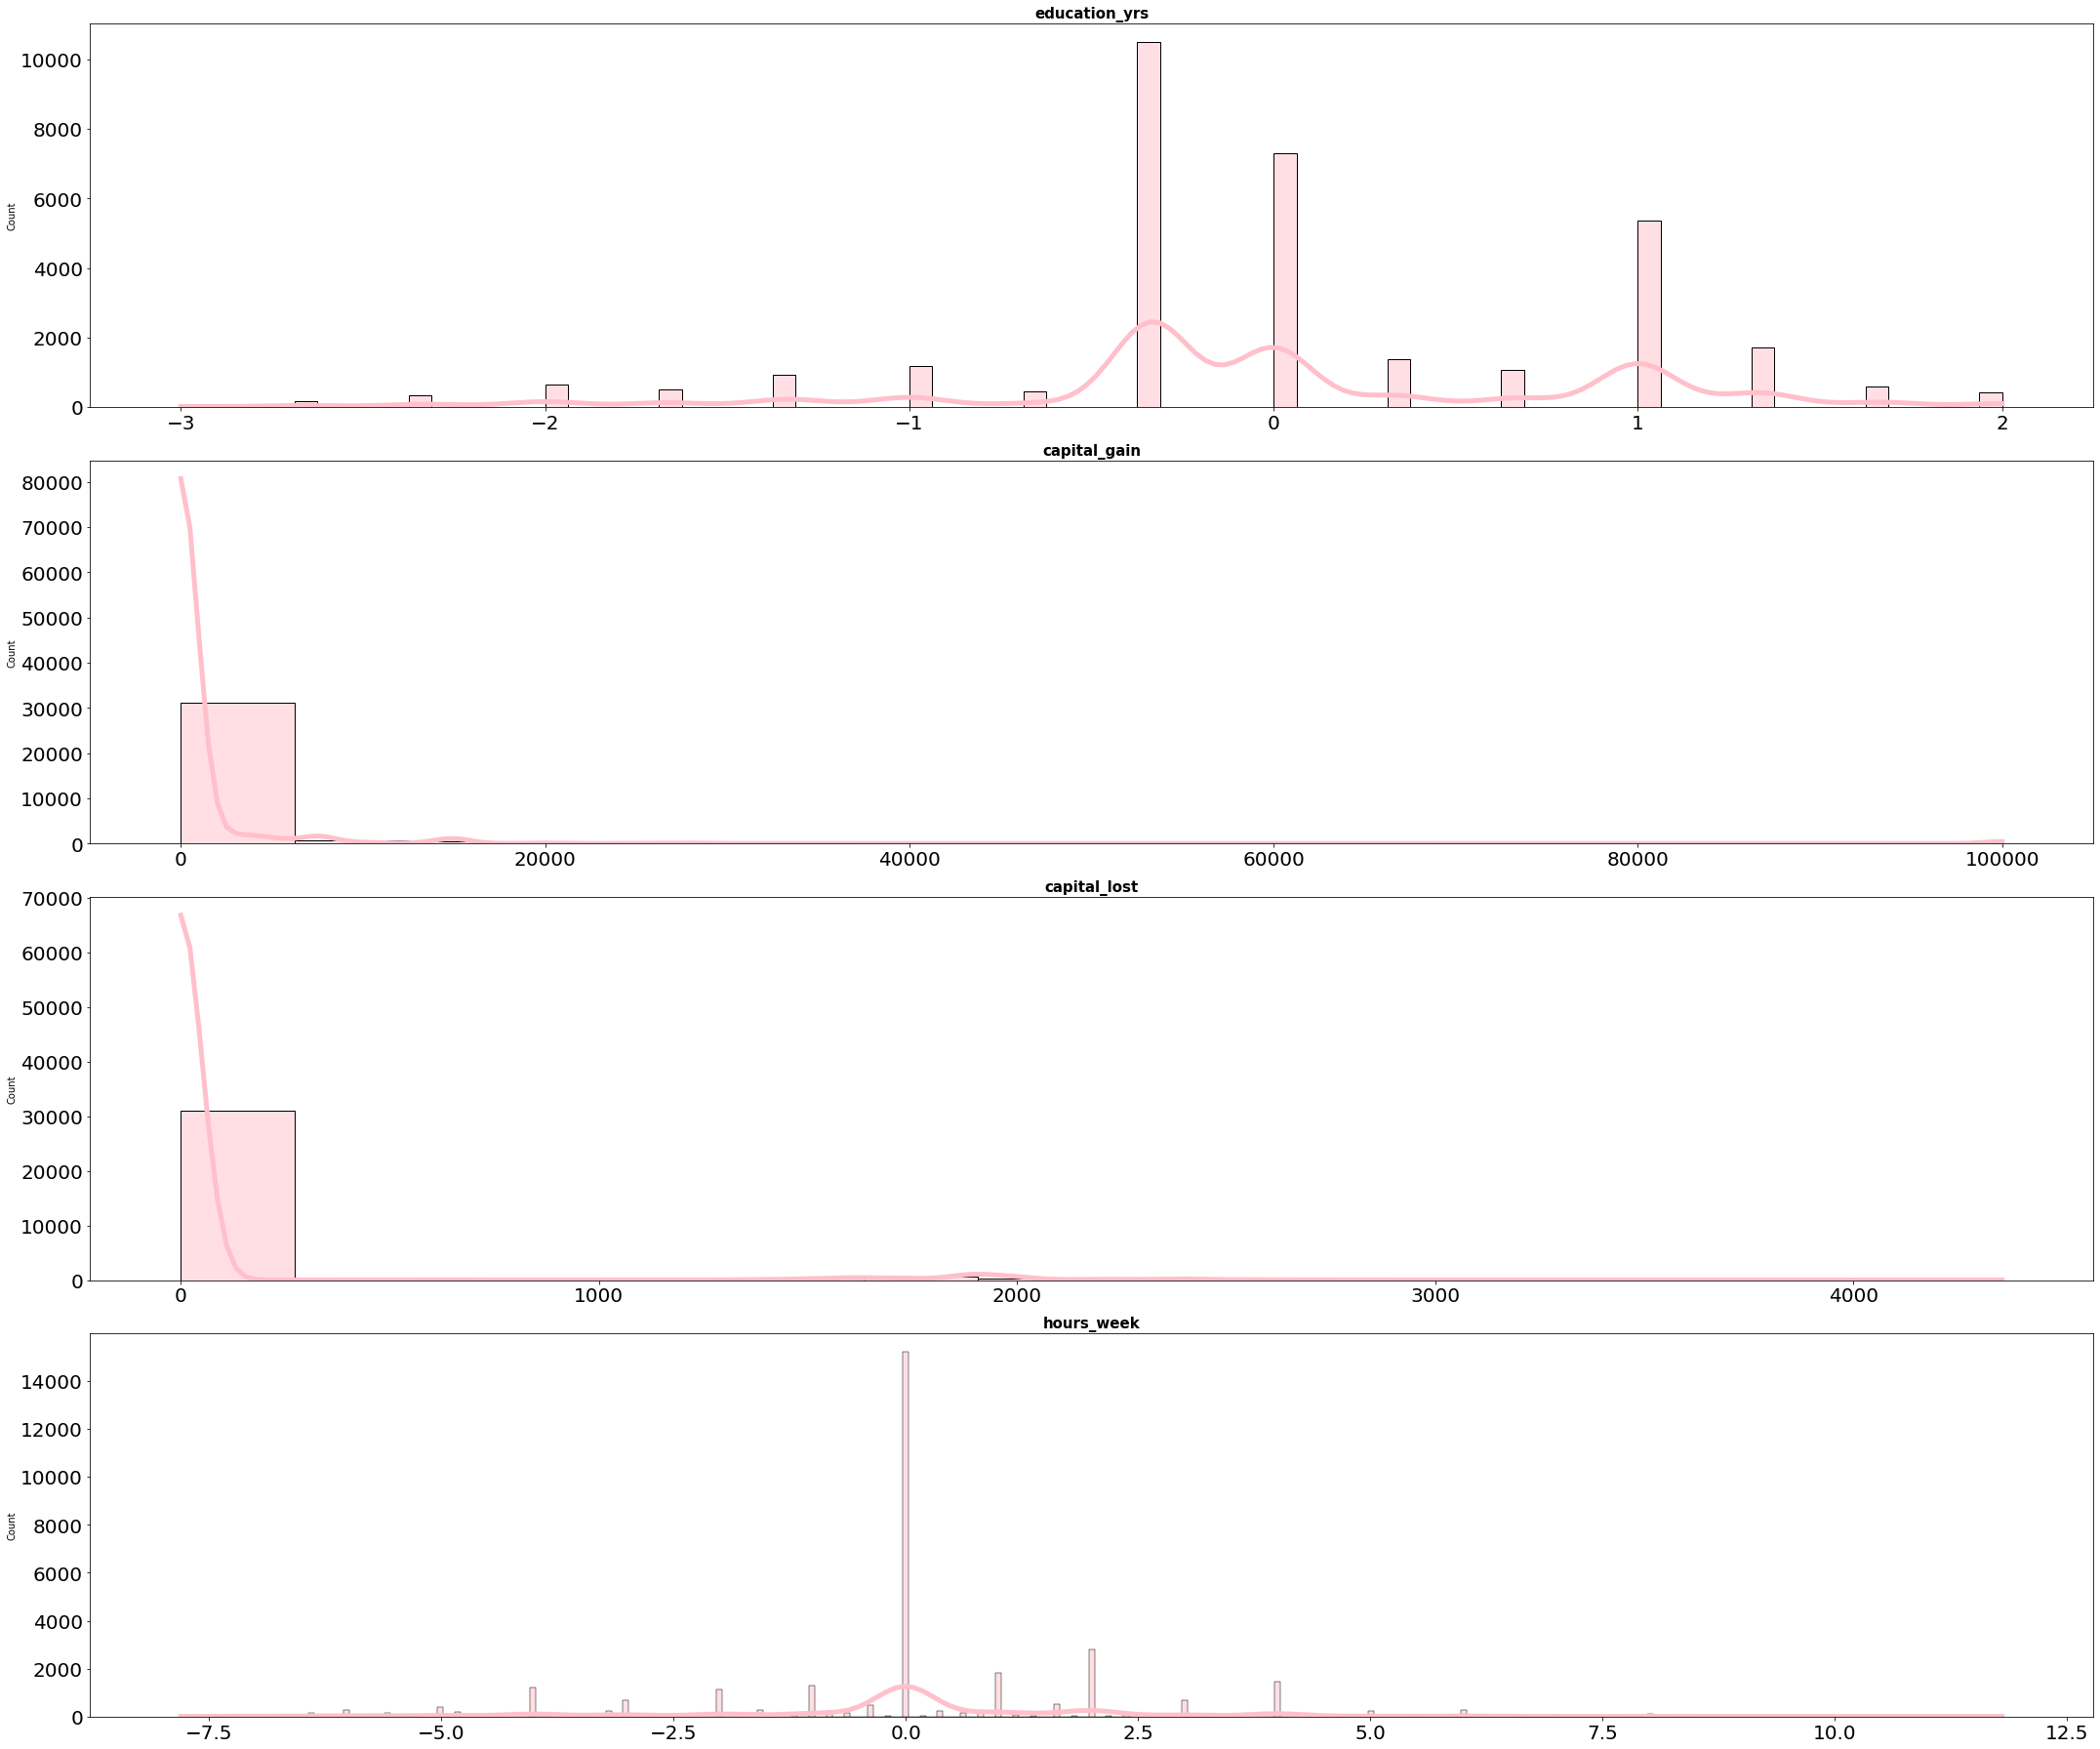

In [36]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (30, 25))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 5},
        color = "pink",
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

- En nuestro caso, sabemos que tenemos muchos outliers por lo que intuimos que el mejor metodo para estandarizar sería el RobustScaler. 

In [37]:
# vamos a guardar este dataframe para seguir trabajando en la siguiente lección de Encoding con el. Pero antes
# de eso tenemos que juntar los resultados de la estandarización a nuestro dataframe original

df[numericas_robust.columns] = numericas_robust
df.head()



,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,-0.333333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,-2.0,United-States,24006
38,Private,HS-grad,0.666667,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.0,United-States,44640
53,Private,11th,-0.333333,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,4.0,United-States,18011
28,Private,Bachelors,-0.333333,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.0,Cuba,29747
37,Private,Masters,0.000000,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,-0.4,United-States,19350


In [38]:
df.to_csv("data/adult.numericas_robust.csv")